# Intro to Data Science - Final Project 

##### Copyright 2022, Group 4


#1-Importing the libraries:

In [131]:
# install.packages('arules')
# install.packages('arulesViz')
# install.packages('MASS')
# install.packages('maps')
# install.packages('ggplot2')
# install.packages('ggmap')
# install.packages('mapproj')
# install.packages('imputeTS')
# install.packages('caret')
# install.packages('arulesViz')
# install.packages('arules')
# install.packages('kernlab')
library(tidyverse)
library(MASS)
library(imputeTS)
library(ggplot2)
library(maps)
library(ggmap)
library(mapproj)
library(kernlab)
library(caret)
library(arules)
library(arulesViz)

#2-Data Source, and Data Cleaning

###2.1--Storing the data in df dataset


In [132]:
df<- read_csv('https://intro-datascience.s3.us-east-2.amazonaws.com/HMO_data.csv')
head(df)

Rows: 7582 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): smoker, location, location_type, education_level, yearly_physical, ...
dbl (6): X, age, bmi, children, hypertension, cost

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X age bmi    children smoker location      location_type education_level
1 1 18  27.900 0        yes    CONNECTICUT   Urban         Bachelor       
2 2 19  33.770 1        no     RHODE ISLAND  Urban         Bachelor       
3 3 27  33.000 3        no     MASSACHUSETTS Urban         Master         
4 4 34  22.705 0        no     PENNSYLVANIA  Country       Master         
5 5 32  28.880 0        no     PENNSYLVANIA  Country       PhD            
6 7 47  33.440 1        no     PENNSYLVANIA  Urban         Bachelor       
  yearly_physical exercise   married hypertension gender cost
1 No              Active     Married 0            female 1746
2 No              Not-Active Married 0            male    602
3 No              Active     Married 0            male    576
4 No              Not-Active Married 1            male   5562
5 No              Not-Active Married 0            male    836
6 No              Not-Active Married 0            female 3842

###2.2-Converting the data type to factor:


In [133]:
df <- mutate_if(df,is.character, factor)
df$children <- factor(df$children)
head(df)

X age bmi    children smoker location      location_type education_level
1 1 18  27.900 0        yes    CONNECTICUT   Urban         Bachelor       
2 2 19  33.770 1        no     RHODE ISLAND  Urban         Bachelor       
3 3 27  33.000 3        no     MASSACHUSETTS Urban         Master         
4 4 34  22.705 0        no     PENNSYLVANIA  Country       Master         
5 5 32  28.880 0        no     PENNSYLVANIA  Country       PhD            
6 7 47  33.440 1        no     PENNSYLVANIA  Urban         Bachelor       
  yearly_physical exercise   married hypertension gender cost
1 No              Active     Married 0            female 1746
2 No              Not-Active Married 0            male    602
3 No              Active     Married 0            male    576
4 No              Not-Active Married 1            male   5562
5 No              Not-Active Married 0            male    836
6 No              Not-Active Married 0            female 3842

###2.3-Checking for NA values:


In [134]:
cat('Number of null values in age column: ', sum(is.na(df$age)))
cat("\n")
cat('Number of null values in bmi column: ', sum(is.na(df$bmi)))
cat("\n")
cat('Number of null values in children column: ', sum(is.na(df$children)))
cat("\n")
cat('Number of null values in cost column: ', sum(is.na(df$cost)))
cat("\n")
cat('Number of null values in education_level column: ', sum(is.na(df$education_level)))
cat("\n")
cat('Number of null values in exercise column: ', sum(is.na(df$exercise)))
cat("\n")
cat('Number of null values in gender column: ', sum(is.na(df$gender)))
cat("\n")
cat('Number of null values in hypertension column: ', sum(is.na(df$hypertension)))
cat("\n")
cat('Number of null values in location column: ', sum(is.na(df$location)))
cat("\n")
cat('Number of null values in location_type column: ', sum(is.na(df$location_type)))
cat("\n")
cat('Number of null values in married column: ', sum(is.na(df$married)))
cat("\n")
cat('Number of null values in smoker column: ', sum(is.na(df$smoker)))
cat("\n")
cat('Number of null values in yearly_physical column: ', sum(is.na(df$yearly_physical)))

Number of null values in age column:  0
Number of null values in bmi column:  78
Number of null values in children column:  0
Number of null values in cost column:  0
Number of null values in education_level column:  0
Number of null values in exercise column:  0
Number of null values in gender column:  0
Number of null values in hypertension column:  80
Number of null values in location column:  0
Number of null values in location_type column:  0
Number of null values in married column:  0
Number of null values in smoker column:  0
Number of null values in yearly_physical column:  0

###2.4-Interpolating the Null values: 

In [135]:
df$bmi <- na_interpolation(df$bmi)
df$hypertension <- as.numeric(df$hypertension)
df$hypertension <- na_interpolation(df$hypertension)
df$hypertension <- as.factor(df$hypertension)
#removing the rows with interpolation of 0.5
df <- df%>%filter(hypertension != 0.5)
df$hypertension <- droplevels(df$hypertension)
cat('Number of null values in hypertension column: ', sum(is.na(df$hypertension)))
cat("\n")
cat('Number of null values in bmi column: ', sum(is.na(df$bmi)))
cat("\n")
head(df)

Number of null values in hypertension column:  0
Number of null values in bmi column:  0


X age bmi    children smoker location      location_type education_level
1 1 18  27.900 0        yes    CONNECTICUT   Urban         Bachelor       
2 2 19  33.770 1        no     RHODE ISLAND  Urban         Bachelor       
3 3 27  33.000 3        no     MASSACHUSETTS Urban         Master         
4 4 34  22.705 0        no     PENNSYLVANIA  Country       Master         
5 5 32  28.880 0        no     PENNSYLVANIA  Country       PhD            
6 7 47  33.440 1        no     PENNSYLVANIA  Urban         Bachelor       
  yearly_physical exercise   married hypertension gender cost
1 No              Active     Married 0            female 1746
2 No              Not-Active Married 0            male    602
3 No              Active     Married 0            male    576
4 No              Not-Active Married 1            male   5562
5 No              Not-Active Married 0            male    836
6 No              Not-Active Married 0            female 3842

###2.5-Adding the Expensive Column:

In [136]:
# df$expensive <- ""
# df$expensive[df$cost < 5000] <- 0
# df$expensive <- as.factor(df$expensive)
df$expensive <- "TRUE"
df$expensive[df$cost < 5000] <- "FALSE"
df$expensive <- as.factor(df$expensive)
head(df)

X age bmi    children smoker location      location_type education_level
1 1 18  27.900 0        yes    CONNECTICUT   Urban         Bachelor       
2 2 19  33.770 1        no     RHODE ISLAND  Urban         Bachelor       
3 3 27  33.000 3        no     MASSACHUSETTS Urban         Master         
4 4 34  22.705 0        no     PENNSYLVANIA  Country       Master         
5 5 32  28.880 0        no     PENNSYLVANIA  Country       PhD            
6 7 47  33.440 1        no     PENNSYLVANIA  Urban         Bachelor       
  yearly_physical exercise   married hypertension gender cost expensive
1 No              Active     Married 0            female 1746 FALSE    
2 No              Not-Active Married 0            male    602 FALSE    
3 No              Active     Married 0            male    576 FALSE    
4 No              Not-Active Married 1            male   5562 TRUE     
5 No              Not-Active Married 0            male    836 FALSE    
6 No              Not-Active Married 0            female 3842 FALSE

###2.6-Get the number of expensive and inexpensive obsservation

In [137]:
print('Table of expensive:')
table(df$expensive)
# from this output we can say that the there are 1793 expensive and 5759 inexpensive

[1] "Table of expensive:"



FALSE  TRUE 
 5759  1793 

###2.7-Get a copy of main dataset and remove the expensive column:


In [138]:
# df_c  contains the cost column and not the expensive column for training the linear regression model.
df_c <- df 
df_c <- df_c[-15]
head(df_c)

X age bmi    children smoker location      location_type education_level
1 1 18  27.900 0        yes    CONNECTICUT   Urban         Bachelor       
2 2 19  33.770 1        no     RHODE ISLAND  Urban         Bachelor       
3 3 27  33.000 3        no     MASSACHUSETTS Urban         Master         
4 4 34  22.705 0        no     PENNSYLVANIA  Country       Master         
5 5 32  28.880 0        no     PENNSYLVANIA  Country       PhD            
6 7 47  33.440 1        no     PENNSYLVANIA  Urban         Bachelor       
  yearly_physical exercise   married hypertension gender cost
1 No              Active     Married 0            female 1746
2 No              Not-Active Married 0            male    602
3 No              Active     Married 0            male    576
4 No              Not-Active Married 1            male   5562
5 No              Not-Active Married 0            male    836
6 No              Not-Active Married 0            female 3842

###2.8-Get a copy of main dataset and remove the cost column:


In [139]:
#df_e contains the expensive column and not the cost column for training the Support Vector Machine(SVM), Logistic Regression, and Association Rules mode.
df_e <- df 
df_e <- df_e[-14]
head(df_e)

X age bmi    children smoker location      location_type education_level
1 1 18  27.900 0        yes    CONNECTICUT   Urban         Bachelor       
2 2 19  33.770 1        no     RHODE ISLAND  Urban         Bachelor       
3 3 27  33.000 3        no     MASSACHUSETTS Urban         Master         
4 4 34  22.705 0        no     PENNSYLVANIA  Country       Master         
5 5 32  28.880 0        no     PENNSYLVANIA  Country       PhD            
6 7 47  33.440 1        no     PENNSYLVANIA  Urban         Bachelor       
  yearly_physical exercise   married hypertension gender expensive
1 No              Active     Married 0            female FALSE    
2 No              Not-Active Married 0            male   FALSE    
3 No              Active     Married 0            male   FALSE    
4 No              Not-Active Married 1            male   TRUE     
5 No              Not-Active Married 0            male   FALSE    
6 No              Not-Active Married 0            female FALSE

#3- Important Variables:

###3.0-Creating expensive & none-expensive subsets:

In [140]:
#create two subset of the data regarding expensiveness
df_exp <- df[df$expensive==TRUE,]
df_cheap <- df[df$expensive==FALSE,]

###3.1- age:

`geom_smooth()` using formula = 'y ~ x'


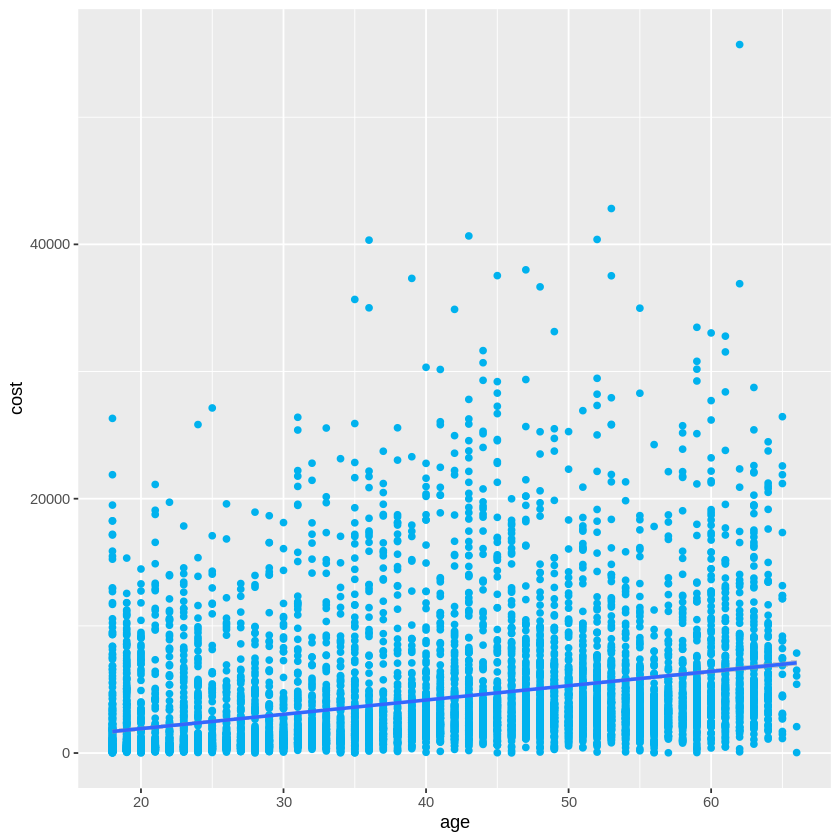

In [141]:
ggplot(data=df) + aes(x=age, y=cost) + geom_point(color="deepskyblue2") + geom_smooth(method="lm") + coord_cartesian( xlim = NULL, ylim = NULL, expand = TRUE, default = FALSE, clip = "on")
#As age increases medical costs go up.

###3.2- bmi:

`geom_smooth()` using formula = 'y ~ x'



Call:
lm(formula = cost ~ bmi, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
 -8442  -2799  -1237    995  51058 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2234.423    288.669   -7.74 1.12e-14 ***
bmi           203.897      9.202   22.16  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4780 on 7550 degrees of freedom
Multiple R-squared:  0.06106,	Adjusted R-squared:  0.06094 
F-statistic:   491 on 1 and 7550 DF,  p-value: < 2.2e-16


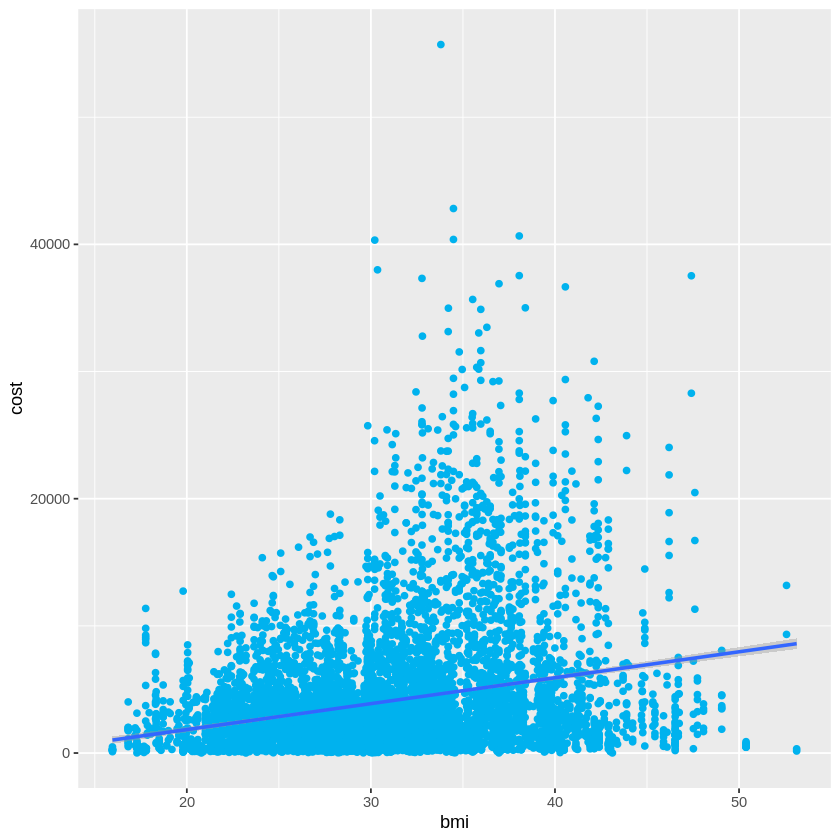

In [142]:
ggplot(data=df) + aes(x=bmi, y=cost) + geom_point(color="deepskyblue2") + geom_smooth(method="lm") + coord_cartesian( xlim = NULL, ylim = NULL, expand = TRUE, default = FALSE, clip = "on")
summary(lm(cost~bmi, data=df))
#As bmi increases medical costs go up.

###3.3- children:


Call:
lm(formula = cost ~ children, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
 -5000  -2986  -1534    855  51733 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3501.30      85.87  40.774  < 2e-16 ***
children1     480.84     144.72   3.323 0.000896 ***
children2    1355.63     158.02   8.579  < 2e-16 ***
children3    1542.82     181.55   8.498  < 2e-16 ***
children4     347.95     437.73   0.795 0.426699    
children5    -704.16     470.34  -1.497 0.134395    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4894 on 7546 degrees of freedom
Multiple R-squared:  0.01621,	Adjusted R-squared:  0.01556 
F-statistic: 24.87 on 5 and 7546 DF,  p-value: < 2.2e-16


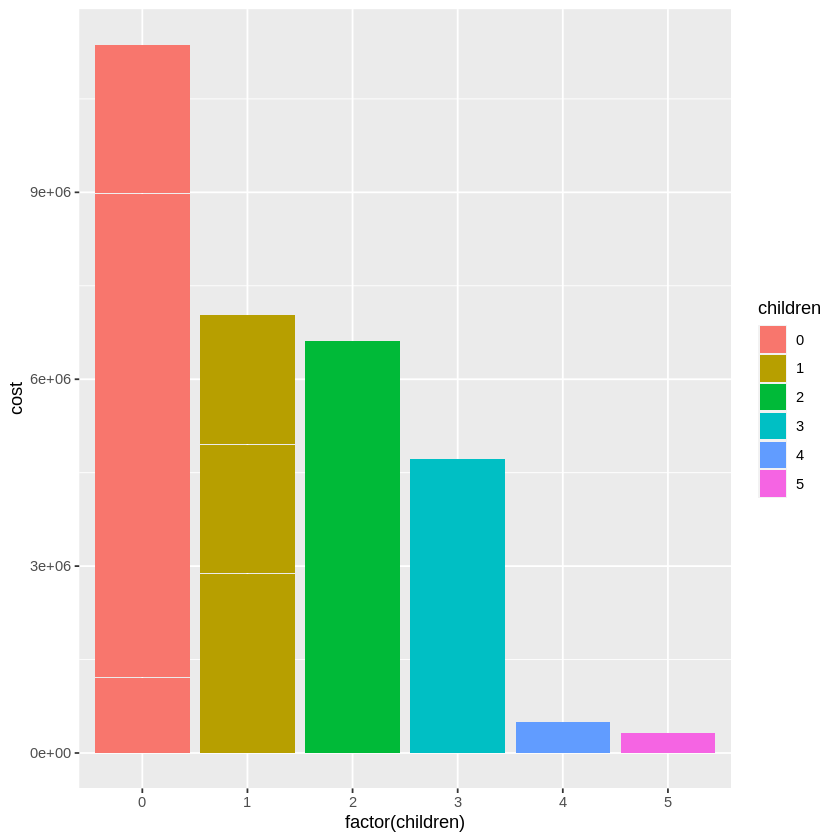

In [143]:
ggplot(data=df) + aes(x=factor(children), y=cost,fill=children) + geom_bar(stat='identity') 
summary(lm(cost~children, data=df))
#People who have no children are more expensive.

###3.4- smoker:

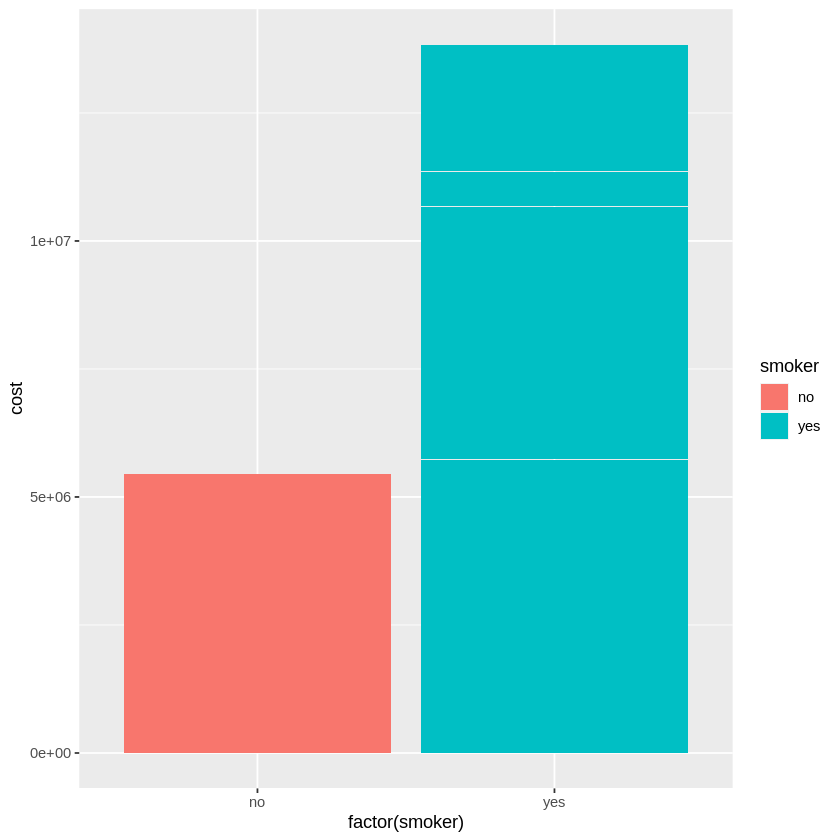

In [144]:
ggplot(data=df_exp) + aes(x=factor(smoker), y=cost, fill=smoker) + geom_bar(stat='identity')
#People who smoke spend more money on healthcare than those who dont smoke.

###3.5- location:

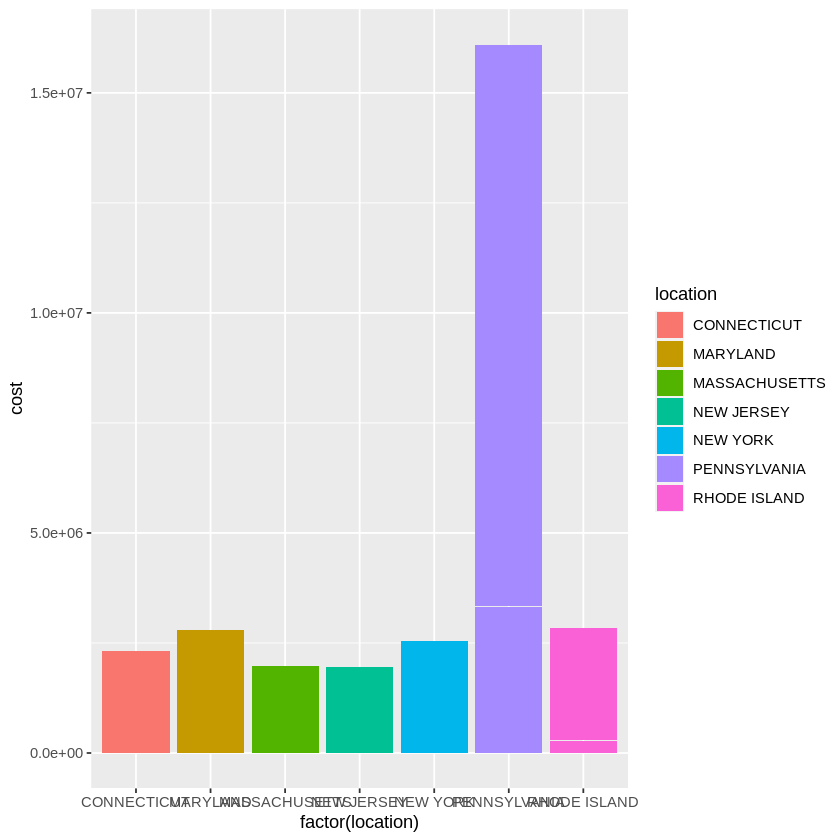

In [145]:
ggplot(data=df) + aes(x=factor(location), y=cost, fill=location) + geom_bar(stat='identity')
#Pennsylvania has the highest cost.

###3.6- location_type:

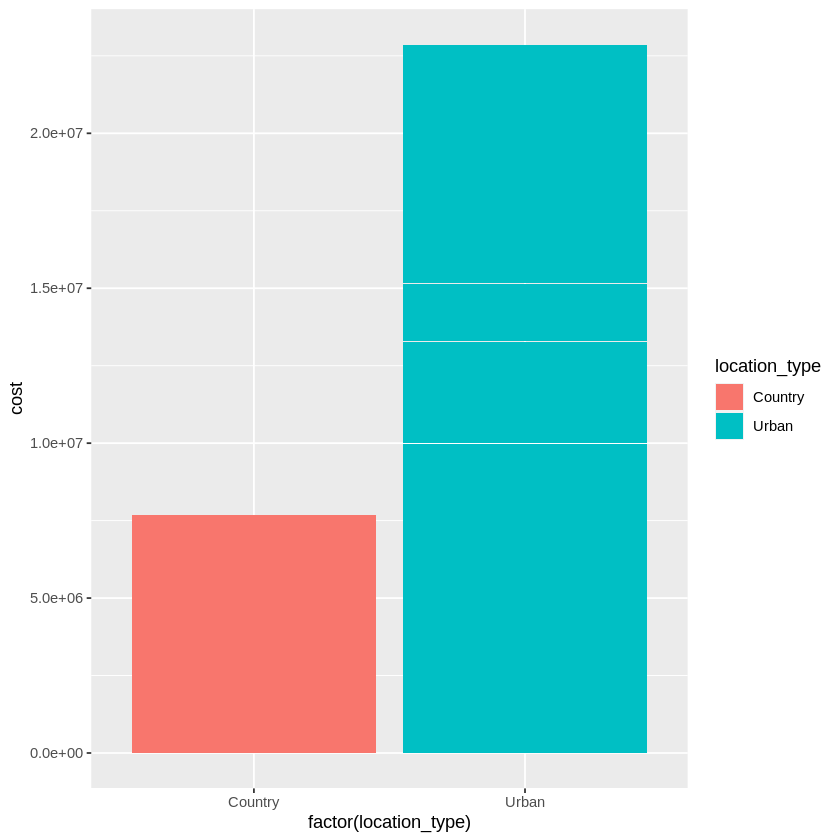

In [146]:
ggplot(data=df) + aes(x=factor(location_type), y=cost, fill=location_type) + geom_bar(stat='identity')
#People who live in urban areas spend more on healtcare than those who live in cities

###3.7- Education_level:

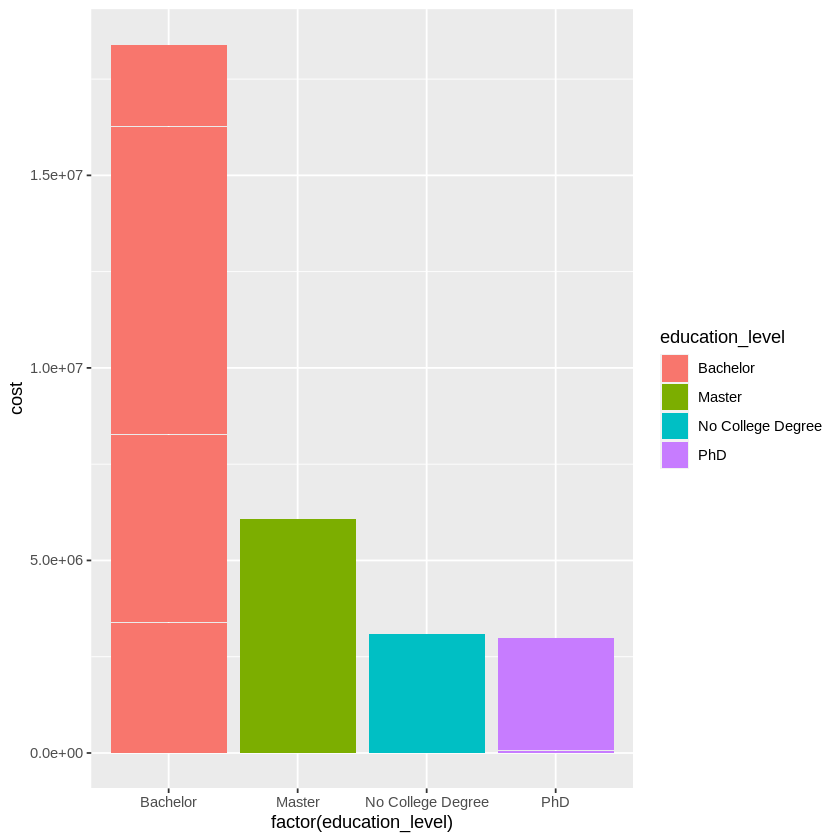

In [147]:
ggplot(data=df) + aes(x=factor(education_level), y=cost, fill=education_level) + geom_bar(stat='identity')
#People who have a bachelor degree are more expensive.

###3.8- yearly_physical:

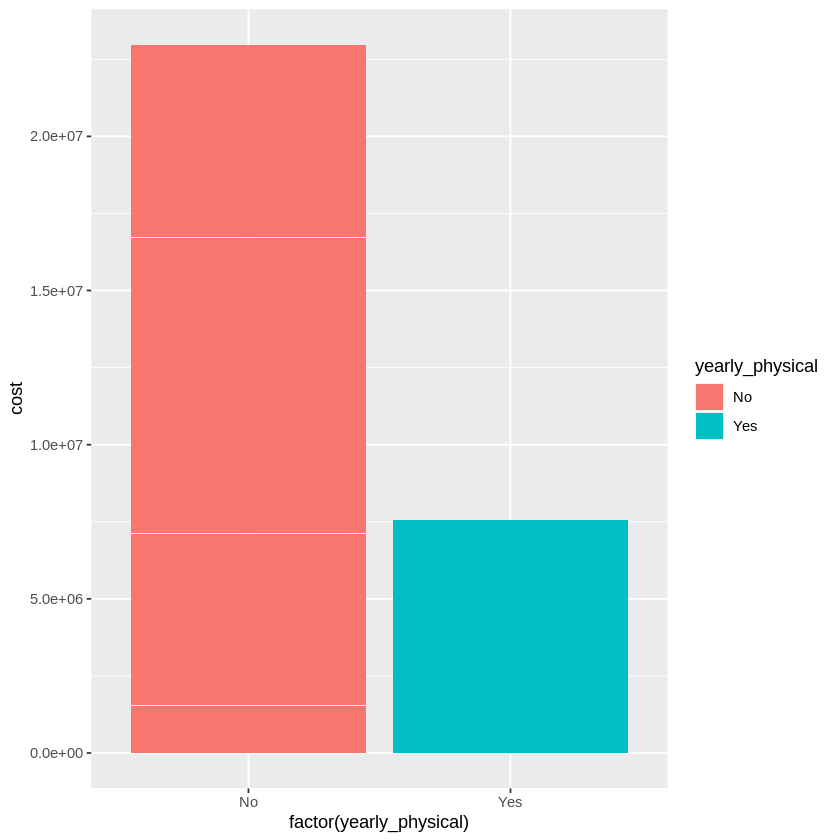

In [148]:
ggplot(data=df) + aes(x=factor(yearly_physical), y=cost, fill=yearly_physical) + geom_bar(stat='identity')
#People who are not active spend more on healthcare than those who are on average.

###3.9- Exercise:

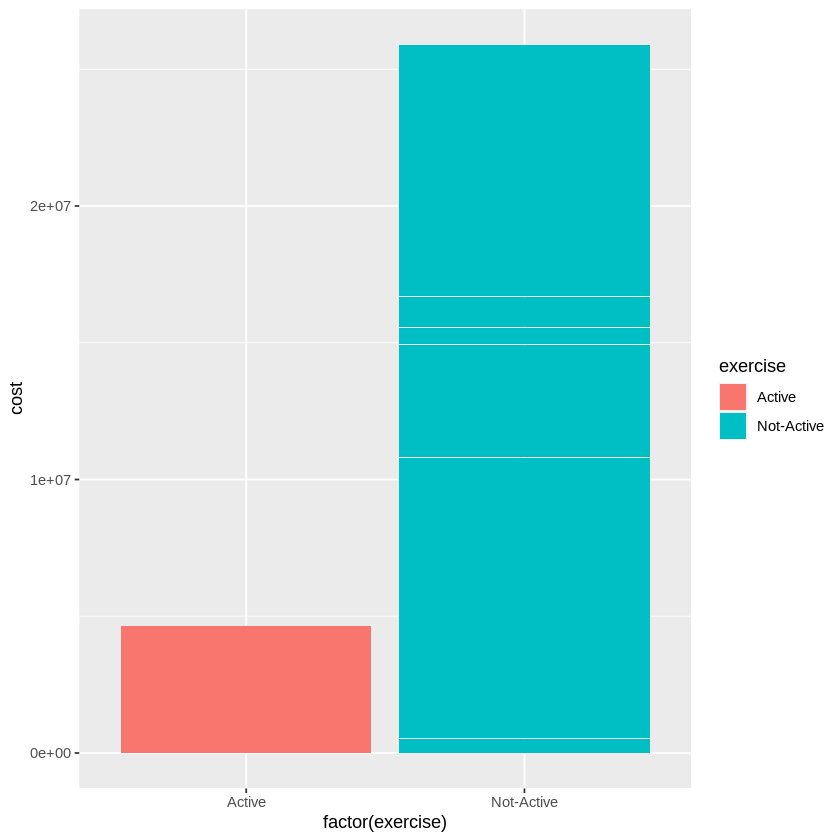

In [149]:
ggplot(data=df) + aes(x=factor(exercise), y=cost, fill=exercise) + geom_bar(stat='identity')
#People who dont exercise spend more on healthcare than those who do on average.

###3.10- Married:

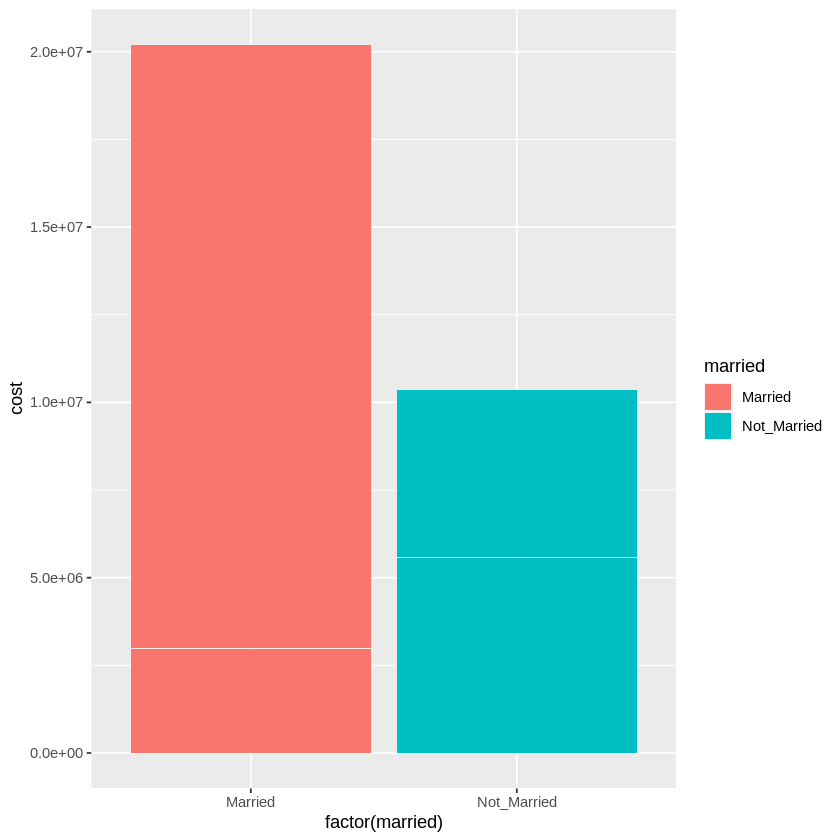

In [150]:
ggplot(data=df) + aes(x=factor(married), y=cost, fill=married) + geom_bar(stat='identity')
#Married people are more expensive than unmarried

###3.11- hypertension:

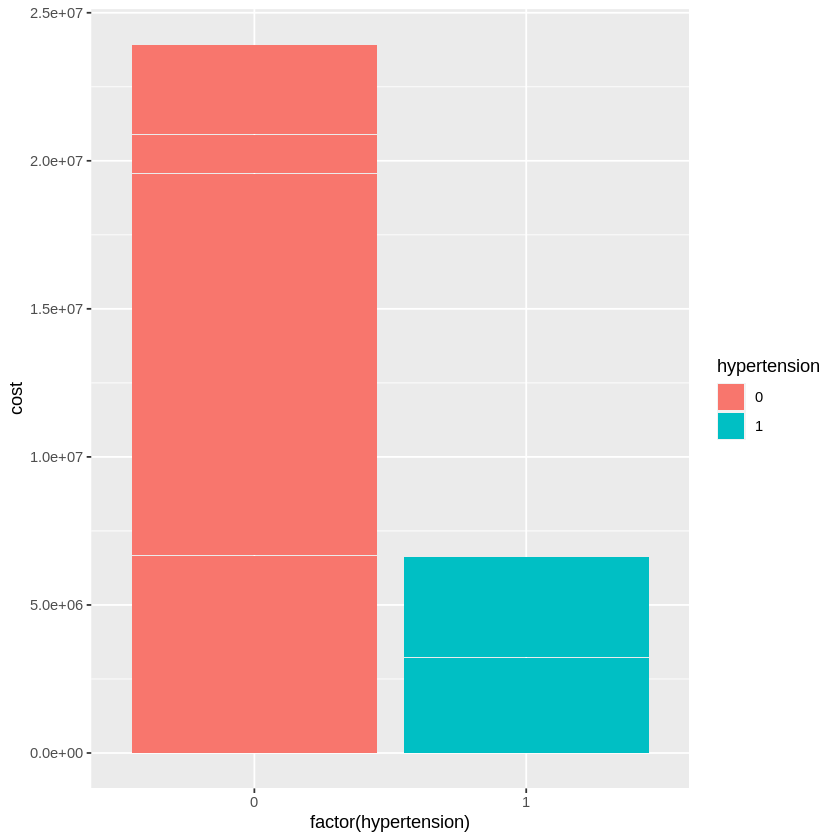

In [151]:
ggplot(data=df) + aes(x=factor(hypertension), y=cost, fill=hypertension) + geom_bar(stat='identity')

###3.12- Gender:

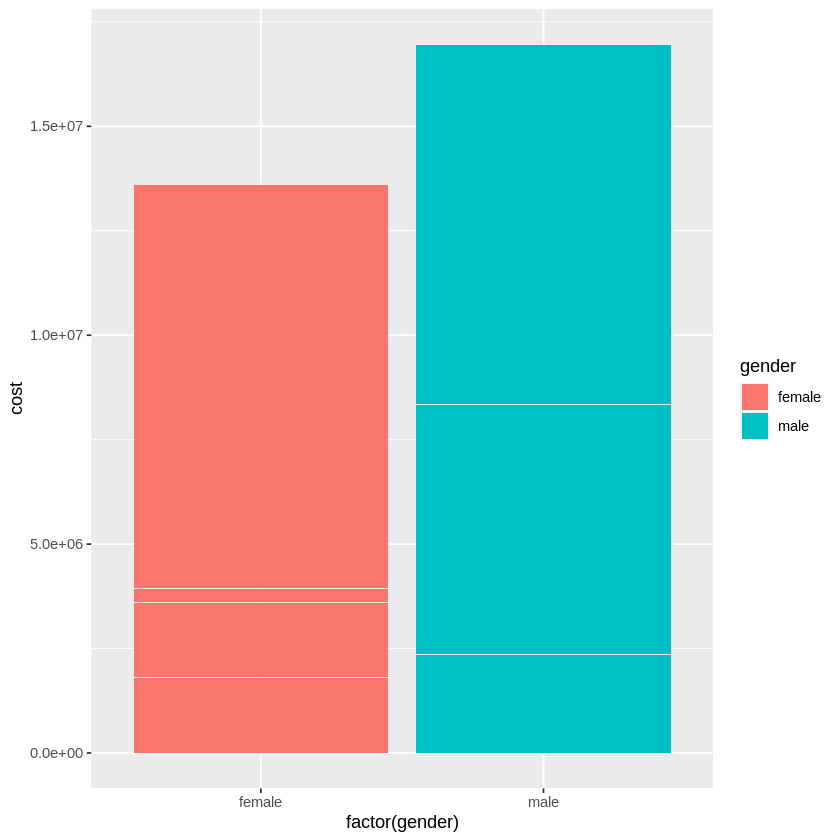

In [152]:
ggplot(data=df) + aes(x=factor(gender), y=cost, fill=gender) + geom_bar(stat='identity')
#Males are more expensive than females.

###3.13-Creating the Table of Categorical variables:


In [153]:
print('Table of education_level:')
table(df$education_level)
print('Table of Children:')
table(df$children)
print('Table of hypertension:')
table(df$hypertension)
print('Table of exercise:')
table(df$exercise)
print('Table of expensive:')
table(df$expensive)
print('Table of gender:')
table(df$gender)
print('Table of location:')
table(df$location)
print('Table of location_type:')
table(df$location_type)
print('Table of married:')
table(df$married)
print('Table of smoker:')
table(df$smoker)
print('Table of yearly_physical:')
table(df$yearly_physical)

[1] "Table of education_level:"



         Bachelor            Master No College Degree               PhD 
             4558              1528               757               709 

[1] "Table of Children:"



   0    1    2    3    4    5 
3248 1765 1361  936  130  112 

[1] "Table of hypertension:"



   0    1 
6047 1505 

[1] "Table of exercise:"



    Active Not-Active 
      1883       5669 

[1] "Table of expensive:"



FALSE  TRUE 
 5759  1793 

[1] "Table of gender:"



female   male 
  3647   3905 

[1] "Table of location:"



  CONNECTICUT      MARYLAND MASSACHUSETTS    NEW JERSEY      NEW YORK 
          607           743           463           496           544 
 PENNSYLVANIA  RHODE ISLAND 
         3998           701 

[1] "Table of location_type:"



Country   Urban 
   1893    5659 

[1] "Table of married:"



    Married Not_Married 
       5042        2510 

[1] "Table of smoker:"



  no  yes 
6079 1473 

[1] "Table of yearly_physical:"



  No  Yes 
5679 1873 

None of observed variables have to be normal in linear regression analysis, which includes t-test and ANOVA. The errors after modeling, however, should be normal to draw a valid conclusion by hypothesis testing


###3.13-Creating a Geographic Map:

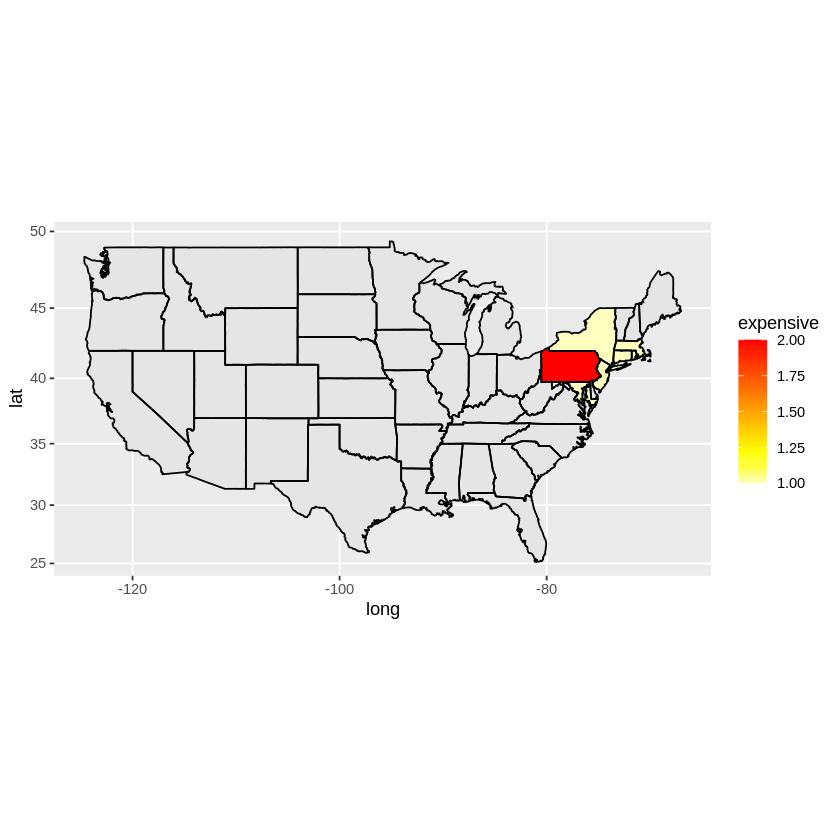

In [154]:
dfmap <- df 
dfmap$region <- tolower(dfmap$location)

dfmap$expensive <- as.numeric(dfmap$expensive)

states <- map_data("state")
map.dfmap <- merge(states,dfmap, by="region", all.x=T)
map.dfmap <- map.dfmap[order(map.dfmap$order),]
ggplot(map.dfmap, aes(x=long,y=lat,group=group))+
  geom_polygon(aes(fill=expensive))+
  geom_path()+ 
  scale_fill_gradientn(colours=rev(heat.colors(10)),na.value="grey90")+
  coord_map()

dfmap$expensive <- as.factor(dfmap$expensive)

#4-Linear Regression:

###4.1-Generate a list of cases to include in the training data:

In [155]:
set.seed(111)
trainListlm <- createDataPartition(y=df$cost, p=.70, list=FALSE)

###4.2-Create train and test data set:

In [156]:
trainDatalm <- df [trainListlm,]
testDatalm <-  df [-trainListlm,]

###4.3-What are the significant variable:

In [157]:
lmodelFinalsignif <- lm(cost ~ . ,data=trainDatalm)
summary(lmodelFinalsignif)


Call:
lm(formula = cost ~ ., data = trainDatalm)

Residuals:
   Min     1Q Median     3Q    Max 
 -8992  -1005    -71    776  41287 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -5.576e+03  2.904e+02 -19.202  < 2e-16 ***
X                                 4.871e-06  7.420e-06   0.657 0.511494    
age                               6.403e+01  2.861e+00  22.382  < 2e-16 ***
bmi                               1.161e+02  6.652e+00  17.453  < 2e-16 ***
children1                         3.630e+02  9.951e+01   3.648 0.000267 ***
children2                         6.633e+02  1.079e+02   6.149 8.35e-10 ***
children3                         5.045e+02  1.236e+02   4.081 4.54e-05 ***
children4                         4.413e+02  2.977e+02   1.482 0.138296    
children5                         7.820e+02  3.162e+02   2.473 0.013427 *  
smokeryes                         4.465e+03  1.204e+02  37.086  < 2e-16 ***
locationMARYLAN

###4.4-Constructing the linear model:


In [158]:
# # lmodel1 <- lm(cost ~.,data=sorted_trainDataLM1)
# # summary(lmodel1)

# lmodel1 <- lm(cost ~ age+ bmi+ children+ smoker+ location+ exercise + yearly_physical+ hypertension + married ,data=df)
# summary(lmodel1)
lmodelFinal <- lm(cost ~ age+ bmi+ children+ smoker+ location+ exercise+ hypertension ,data=trainDatalm)
summary(lmodelFinal)


Call:
lm(formula = cost ~ age + bmi + children + smoker + location + 
    exercise + hypertension, data = trainDatalm)

Residuals:
   Min     1Q Median     3Q    Max 
-12005  -1484   -330   1031  41635 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -9208.208    313.449 -29.377  < 2e-16 ***
age                      99.745      3.260  30.601  < 2e-16 ***
bmi                     185.922      7.657  24.280  < 2e-16 ***
children1               392.258    117.823   3.329 0.000877 ***
children2               887.175    127.591   6.953    4e-12 ***
children3               567.379    146.040   3.885 0.000104 ***
children4              1180.974    352.016   3.355 0.000800 ***
children5               852.957    374.542   2.277 0.022806 *  
smokeryes              7732.234    114.839  67.331  < 2e-16 ***
locationMARYLAND       -280.146    214.058  -1.309 0.190681    
locationMASSACHUSETTS   -90.565    247.243  -0.366 0.714155    
locationNEW J

###4.5-Prediction for the test data set:

In [159]:
# PredtestData<- data.frame(predict(lmodel1, sorted_testDataLM1))
# PredtestData$Actual_value <- sorted_testDataLM1$cost
# head(PredtestData)
predictValues <- predict(lmodelFinal, newdata=testDatalm)
PV <- data.frame(predictValues)
head(PV)

predictValues
1 1630.2523    
2 4366.4945    
3 9496.3808    
4 3478.3927    
5  587.7675    
6 4518.0574

###4.6-Add expensive column:

In [160]:
PV$expensive <- 1
PV$expensive[PV$predictValues < 5000] <- 0
PV$expensive <- factor(PV$expensive)
head(PV)

predictValues expensive
1 1630.2523     0        
2 4366.4945     0        
3 9496.3808     1        
4 3478.3927     0        
5  587.7675     0        
6 4518.0574     0

###4.7-Calculate the confusion matrix:

In [161]:
table(PV$expensive,testDatalm$expensive)

   
    FALSE TRUE
  0  1469  123
  1   257  415

###4.8-Calculate the accuracy:

In [162]:
sum(diag(table(PV$expensive, testDatalm$expensive)))/sum(table(PV$expensive, testDatalm$expensive))

[1] 0.8321555

###4.9- Sensitivity:

In [163]:
415/(415+123)

[1] 0.7713755

###4.10-Import and clean the sample data:

In [164]:
sampleData <- read_csv("/content/HMO_TEST_data_sample.csv")
sampleData <- mutate_if(sampleData,is.character, factor)
sampleData$children <- as.factor(sampleData$children)
sampleData$hypertension <- as.factor(sampleData$hypertension)
head(sampleData)

Rows: 20 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): smoker, location, location_type, education_level, yearly_physical, ...
dbl (5): X, age, bmi, children, hypertension

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X  age bmi   children smoker location     location_type education_level
1  8 37  27.74 3        no     NEW JERSEY   Urban         Bachelor       
2 10 60  25.84 0        no     PENNSYLVANIA Urban         Bachelor       
3 20 30  35.30 0        yes    NEW YORK     Country       PhD            
4 24 34  31.92 1        yes    PENNSYLVANIA Urban         Bachelor       
5 30 31  36.30 2        yes    PENNSYLVANIA Urban         Master         
6 31 22  35.60 0        yes    CONNECTICUT  Country       Bachelor       
  yearly_physical exercise   married     hypertension gender
1 Yes             Not-Active Not_Married 0            female
2 No              Not-Active Married     0            female
3 No              Not-Active Married     0            male  
4 No              Not-Active Married     0            female
5 Yes             Not-Active Not_Married 0            male  
6 No              Not-Active Not_Married 1            male

###4.11-Training the linear model with the whole data set:

In [165]:
lmodelFinal2 <- lm(cost ~ age+ bmi+ children+ smoker+ location+ exercise+ hypertension ,data=df)
summary(lmodelFinal2)


Call:
lm(formula = cost ~ age + bmi + children + smoker + location + 
    exercise + hypertension, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-12019  -1474   -340   1008  41812 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -9127.607    257.150 -35.495  < 2e-16 ***
age                     102.117      2.637  38.731  < 2e-16 ***
bmi                     181.255      6.239  29.050  < 2e-16 ***
children1               297.351     95.320   3.119 0.001818 ** 
children2               852.465    104.110   8.188 3.09e-16 ***
children3               478.194    120.076   3.982 6.89e-05 ***
children4              1209.542    288.282   4.196 2.75e-05 ***
children5               740.015    310.183   2.386 0.017070 *  
smokeryes              7672.105     93.960  81.653  < 2e-16 ***
locationMARYLAND       -135.553    176.136  -0.770 0.441564    
locationMASSACHUSETTS    -8.957    198.729  -0.045 0.964050    
locationNEW JERSEY    

###4.12-Prediction for sample data:

In [166]:
predFinal2 <- predict(lmodelFinal2, newdata=sampleData)
PV2 <- data.frame(predFinal2)
PV2

predFinal2
1   2546.7602
2   3949.1742
3  10742.1846
4  10365.6079
5  11408.2669
6   9847.2728
7  10428.2051
8  11318.5622
9    749.2737
10  1520.9202
11  6841.6893
12  2280.1467
13  4120.2226
14  6229.6491
15  8177.5441
16  2672.2048
17  2858.7464
18   335.0087
19  4673.1330
20  2862.7465

###4.13-Change the format of prediction data:

In [167]:
#Add index:
PV2$X <- sampleData$X
#Add expensive column:
PV2$expensive <- 1
PV2$expensive[PV2$predFinal2 < 5000] <- 0
PV2$expensive <- factor(PV2$expensive)
#Changing the expensive column values from 0/1 to FALSE/TRUE
PV3 <- PV2
PV3$expensive <- as.character(PV3$expensive)
PV3$expensive[PV3$expensive == '1'] <- 'TRUE'
PV3$expensive[PV3$expensive == '0'] <- 'FALSE'
PV3$expensive <- as.factor(PV3$expensive)
PV3 <- (PV3[, -1])
head(PV3)

X  expensive
1  8 FALSE    
2 10 FALSE    
3 20 TRUE     
4 24 TRUE     
5 30 TRUE     
6 31 TRUE

###4.14-Importing the sample solution:

In [168]:
sampleSolution <- read.csv("/content/HMO_TEST_data_sample_solution.csv")
sampleSolution

X  expensive
1   8  TRUE    
2  10  TRUE    
3  20 FALSE    
4  24 FALSE    
5  30 FALSE    
6  31  TRUE    
7  35  TRUE    
8  39  TRUE    
9  41 FALSE    
10 42 FALSE    
11 58  TRUE    
12 68 FALSE    
13 69 FALSE    
14 70 FALSE    
15 71 FALSE    
16 72 FALSE    
17 76 FALSE    
18 79  TRUE    
19 82 FALSE    
20 89  TRUE

###4.15- Calculate the confusion matrix:



In [169]:
table(sampleSolution$expensive, PV3$expensive)

       
        FALSE TRUE
  FALSE     7    5
  TRUE      4    4

###4.15-Calculating the accuracy for the sample data:

In [170]:
sum(diag(table(sampleSolution$expensive, PV3$expensive)))/sum(table(sampleSolution$expensive, PV3$expensive))

[1] 0.55

###4.16-Calculating the sensitivity:

In [171]:
4/(4+5)

[1] 0.4444444

#5-SVM:

###5.1-Generate a list of cases to include in the training data:

In [172]:
set.seed(111)
trainList <- createDataPartition(y=df_e$expensive, p=.70, list=FALSE)

###5.2-Create train and test data set:

In [173]:
trainData <- df_e [trainList,]
testData <-  df_e [-trainList,]

###5.3-Import and merge the sample data and sample solution:

In [174]:
#Import the sample data:
sampleData <- read_csv("/content/HMO_TEST_data_sample.csv")
#Importing the sample solution:
sampleSolution <- read.csv("/content/HMO_TEST_data_sample_solution.csv")
#Joining the samples data and sample solution:
SampleMergedsvm <- merge(sampleSolution, sampleData, by = "X")
#Changing the sequence of columns:
SampleMergedsvm <- SampleMergedsvm[, c(1,3,4,5,6,7,8,9,10,11,12,13,14,2)]
SampleMergedsvm <- mutate_if(SampleMergedsvm,is.character, factor)
SampleMergedsvm$children <- as.factor(SampleMergedsvm$children)
SampleMergedsvm$hypertension <- as.factor(SampleMergedsvm$hypertension)
#Adding one row from the main data set to adjust the levels
Sample_additionsvm <- df_e%>%filter(children == 4)%>%filter(location == "RHODE ISLAND")
Sample_additionsvm <-Sample_additionsvm[1,]
SampleMergedsvm <- rbind(SampleMergedsvm, Sample_additionsvm)
#changing the variable expensive type
SampleMergedsvm$expensive <- as.factor(SampleMergedsvm$expensive)
#Explore the sample data 
head(SampleMergedsvm)

Rows: 20 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): smoker, location, location_type, education_level, yearly_physical, ...
dbl (5): X, age, bmi, children, hypertension

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X  age bmi   children smoker location     location_type education_level
1  8 37  27.74 3        no     NEW JERSEY   Urban         Bachelor       
2 10 60  25.84 0        no     PENNSYLVANIA Urban         Bachelor       
3 20 30  35.30 0        yes    NEW YORK     Country       PhD            
4 24 34  31.92 1        yes    PENNSYLVANIA Urban         Bachelor       
5 30 31  36.30 2        yes    PENNSYLVANIA Urban         Master         
6 31 22  35.60 0        yes    CONNECTICUT  Country       Bachelor       
  yearly_physical exercise   married     hypertension gender expensive
1 Yes             Not-Active Not_Married 0            female TRUE     
2 No              Not-Active Married     0            female TRUE     
3 No              Not-Active Married     0            male   FALSE    
4 No              Not-Active Married     0            female FALSE    
5 Yes             Not-Active Not_Married 0            male   FALSE    
6 No              Not-Active Not_Married 1            male   TRUE

###5.4-Training the SVM model with train data:

In [175]:
svmModel <- ksvm(expensive ~ smoker+ age+ bmi+ exercise + children, data = trainData, C = 5, cross = 3, prob.model = TRUE)
#Investigate the SVM model:
svmModel

# smoker+ age+ bmi+ exercise : Sensitivity : 0.9774, Accuracy : 0.8807
# smoker+ age+ bmi+ exercise + children : Sensitivity : 0.9751, Accuracy : 0.8838
# smoker+ age+ bmi+ exercise+ married, Sensitivity : 0.9768, Accuracy : 0.8812
# age+ bmi+ children+ smoker+ location+ exercise+ hypertension : Sensitivity : 0.9710, Accuracy : 0.8772
# . : Sensitivity : 0.9722 , Accuracy : 0.8790 

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 5 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.295325135933381 

Number of Support Vectors : 1422 

Objective Function Value : -6156.802 
Training error : 0.106846 
Cross validation error : 0.118758 
Probability model included. 

###5.5-Prediction for the test data set using the SVM model:

In [176]:
predSVM <- predict(svmModel, newdata = testData, type = "response")

###5.6-Calculate	the confusion	matrix and	the accuracy	:

In [177]:
confusionMatrix(predSVM, testData$expensive)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE  1684  220
     TRUE     43  317
                                          
               Accuracy : 0.8838          
                 95% CI : (0.8699, 0.8968)
    No Information Rate : 0.7628          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6379          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9751          
            Specificity : 0.5903          
         Pos Pred Value : 0.8845          
         Neg Pred Value : 0.8806          
             Prevalence : 0.7628          
         Detection Rate : 0.7438          
   Detection Prevalence : 0.8410          
      Balanced Accuracy : 0.7827          
                                          
       'Positive' Class : FALSE           
                     

###5.7-Training the SVM model with the whole data set:

In [178]:
svmModelFinal <- ksvm(expensive ~smoker+ age+ bmi+ exercise + children , data = df_e, C = 5, cross = 3, prob.model = TRUE)
svmModelFinal 

# smoker+ age+ bmi+ exercise : Sensitivity : 0.7500, Accuracy : 0.619
# smoker+ age+ bmi+ exercise + children : Sensitivity : 0.7500, Accuracy : 0.619
# age+ bmi+ children+ smoker+ location+ exercise+ hypertension : Sensitivity : 0.7500, Accuracy : 0.5714 
# smoker+ age+ bmi+ exercise+ married, Sensitivity : 0.7500, Accuracy : 0.5714
# . : Sensitivity : 0.6667 , Accuracy : 0.5238 

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 5 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.292632459918739 

Number of Support Vectors : 2011 

Objective Function Value : -8881.408 
Training error : 0.110434 
Cross validation error : 0.116923 
Probability model included. 

###5.8-Prediction for sample data:

In [179]:
predSVMSample <- predict(svmModelFinal, newdata = SampleMergedsvm, type = "response")

###5.9-Calculate	the confusion	matrix and	the accuracy	:

In [180]:
confusionMatrix(predSVMSample, SampleMergedsvm$expensive)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE     9    5
     TRUE      3    4
                                          
               Accuracy : 0.619           
                 95% CI : (0.3844, 0.8189)
    No Information Rate : 0.5714          
    P-Value [Acc > NIR] : 0.4171          
                                          
                  Kappa : 0.2             
                                          
 Mcnemar's Test P-Value : 0.7237          
                                          
            Sensitivity : 0.7500          
            Specificity : 0.4444          
         Pos Pred Value : 0.6429          
         Neg Pred Value : 0.5714          
             Prevalence : 0.5714          
         Detection Rate : 0.4286          
   Detection Prevalence : 0.6667          
      Balanced Accuracy : 0.5972          
                                          
       'Positive' Class : FALSE           
                     

#6-Association Rules:


###6.1-Descritize the continuous variables and remove the index column:

In [181]:
dfassoc <- df
dfassoc$cost <- discretize(dfassoc$cost, method = "interval", breaks = 3, labels = c("small", "medium", "large"))
dfassoc$bmi <- discretize(dfassoc$bmi, method = "interval", breaks = 3, labels = c("small", "medium", "large"))
dfassoc$age <- discretize(dfassoc$age, method = "interval", breaks = 3, labels = c("young", "middle", "old"))
dfassoc <- dfassoc[,-1]
head(dfassoc, 10)


age    bmi    children smoker location      location_type education_level  
1  young  small  0        yes    CONNECTICUT   Urban         Bachelor         
2  young  medium 1        no     RHODE ISLAND  Urban         Bachelor         
3  young  medium 3        no     MASSACHUSETTS Urban         Master           
4  middle small  0        no     PENNSYLVANIA  Country       Master           
5  young  medium 0        no     PENNSYLVANIA  Country       PhD              
6  middle medium 1        no     PENNSYLVANIA  Urban         Bachelor         
7  middle medium 2        no     PENNSYLVANIA  Urban         Bachelor         
8  old    small  0        no     PENNSYLVANIA  Country       Bachelor         
9  young  small  0        no     PENNSYLVANIA  Urban         Bachelor         
10 old    small  0        yes    CONNECTICUT   Urban         No College Degree
   yearly_physical exercise   married hypertension gender cost  expensive
1  No              Active     Married 0            female small FALSE    
2  No              Not-Active Married 0            male   small FALSE    
3  No              Active     Married 0            male   small FALSE    
4  No              Not-Active Married 1            male   small TRUE     
5  No              Not-Active Married 0            male   small FALSE    
6  No              Not-Active Married 0            female small FALSE    
7  No              Active     Married 0            male   small FALSE    
8  No              Not-Active Married 1            female small TRUE     
9  No              Active     Married 0            male   small FALSE    
10 No              Active     Married 0            female small FALSE

###6.2-One hotencoding the data set:

In [182]:
dftransactions <- as(dfassoc, 'transactions')

###6.3-Generate a list of item frequencies

In [183]:
dfIF <- itemFrequency(dftransactions)
str(dfIF)

 Named num [1:42] 0.402 0.312 0.286 0.358 0.589 ...
 - attr(*, "names")= chr [1:42] "age=young" "age=middle" "age=old" "bmi=small" ...


###6.4-Show the most	and	least	frequent features:

In [184]:
dfIF <- sort(-dfIF)
head(dfIF,14)
tail(dfIF,14)

cost=small                smoker=no           hypertension=0 
              -0.9735169               -0.8049523               -0.8007150 
         expensive=FALSE       yearly_physical=No      exercise=Not-Active 
              -0.7625794               -0.7519862               -0.7506621 
     location_type=Urban          married=Married education_level=Bachelor 
              -0.7493379               -0.6676377               -0.6035487 
              bmi=medium    location=PENNSYLVANIA              gender=male 
              -0.5889831               -0.5293962               -0.5170816 
           gender=female               children=0 
              -0.4829184               -0.4300847

children=3 education_level=No College Degree 
                     -0.123940678                      -0.100238347 
                location=MARYLAND               education_level=PhD 
                     -0.098384534                      -0.093882415 
            location=RHODE ISLAND              location=CONNECTICUT 
                     -0.092823093                      -0.080376059 
                location=NEW YORK               location=NEW JERSEY 
                     -0.072033898                      -0.065677966 
           location=MASSACHUSETTS                         bmi=large 
                     -0.061308263                      -0.052966102 
                      cost=medium                        children=4 
                     -0.025291314                      -0.017213983 
                       children=5                        cost=large 
                     -0.014830508                      -0.001191737

###6.5-Create	a	frequency	plot:

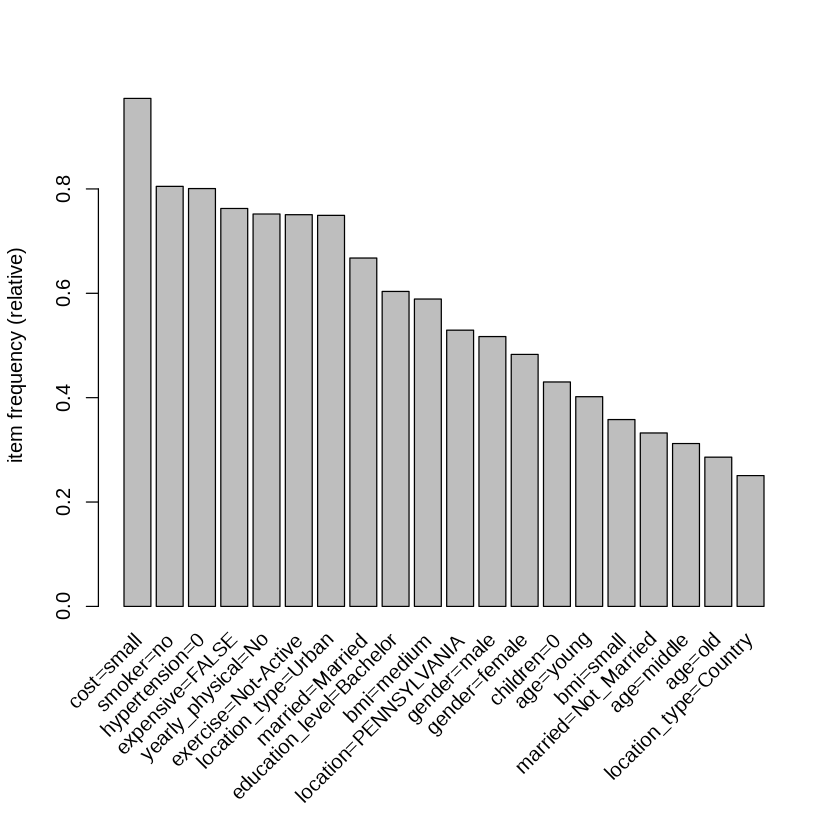

In [185]:
itemFrequencyPlot(dftransactions, topN=20)

###6.6-Create	a	cross	table:

In [186]:
ct	<-	crossTable(dftransactions,	sort=TRUE)
ct[1:14,	1:14]

cost=small smoker=no hypertension=0 expensive=FALSE
cost=small               7352       6077      5891           5759           
smoker=no                6077       6079      4885           5344           
hypertension=0           5891       4885      6047           4666           
expensive=FALSE          5759       5344      4666           5759           
yearly_physical=No       5526       4557      4547           4343           
exercise=Not-Active      5480       4588      4532           4113           
location_type=Urban      5510       4549      4511           4324           
married=Married          4909       4071      4036           3855           
education_level=Bachelor 4433       3684      3662           3493           
bmi=medium               4268       3630      3549           3193           
location=PENNSYLVANIA    3888       3212      3200           3049           
gender=male              3778       3019      3121           2874           
gender=female            3574       3060      2926           2885           
children=0               3184       2646      2608           2568           
                         yearly_physical=No exercise=Not-Active
cost=small               5526               5480               
smoker=no                4557               4588               
hypertension=0           4547               4532               
expensive=FALSE          4343               4113               
yearly_physical=No       5679               4274               
exercise=Not-Active      4274               5669               
location_type=Urban      4256               4262               
married=Married          3762               3816               
education_level=Bachelor 3413               3410               
bmi=medium               3358               3345               
location=PENNSYLVANIA    3046               2984               
gender=male              2951               2920               
gender=female            2728               2749               
children=0               2443               2429               
                         location_type=Urban married=Married
cost=small               5510                4909           
smoker=no                4549                4071           
hypertension=0           4511                4036           
expensive=FALSE          4324                3855           
yearly_physical=No       4256                3762           
exercise=Not-Active      4262                3816           
location_type=Urban      5659                3824           
married=Married          3824                5042           
education_level=Bachelor 3405                3038           
bmi=medium               3328                2968           
location=PENNSYLVANIA    3025                2683           
gender=male              2926                2611           
gender=female            2733                2431           
children=0               2431                2177           
                         education_level=Bachelor bmi=medium
cost=small               4433                     4268      
smoker=no                3684                     3630      
hypertension=0           3662                     3549      
expensive=FALSE          3493                     3193      
yearly_physical=No       3413                     3358      
exercise=Not-Active      3410                     3345      
location_type=Urban      3405                     3328      
married=Married          3038                     2968      
education_level=Bachelor 4558                     2690      
bmi=medium               2690                     4448      
location=PENNSYLVANIA    2382                     2372      
gender=male              2325                     2311      
gender=female            2233                     2137      
children=0               1935                     1941      
                         location=PENNSYLVANIA gender=male gender=female
cost=sm

###6.7-Create association rules:

In [196]:
assocRules <- apriori(dftransactions,
 parameter=list(supp=0.5, conf=0.88),
 control=list(verbose=F),
 appearance=list(default="lhs",rhs=("expensive=FALSE")))

###6.8-Invesitigate the rules:

In [197]:
assocRules
inspect(assocRules)

set of 6 rules 

    lhs                       rhs                 support confidence  coverage     lift count
[1] {smoker=no,                                                                              
     location_type=Urban}  => {expensive=FALSE} 0.5307203  0.8810728 0.6023570 1.155385  4008
[2] {smoker=no,                                                                              
     yearly_physical=No}   => {expensive=FALSE} 0.5311176  0.8801843 0.6034163 1.154220  4011
[3] {smoker=no,                                                                              
     hypertension=0}       => {expensive=FALSE} 0.5733581  0.8863869 0.6468485 1.162354  4330
[4] {smoker=no,                                                                              
     location_type=Urban,                                                                    
     cost=small}           => {expensive=FALSE} 0.5307203  0.8814603 0.6020922 1.155893  4008
[5] {smoker=no,                                             

#7- Logistic Regression:

###7.1-Training the Logistic model:

In [189]:
Logistic_Model = glm(expensive ~ ., data=trainData, family=binomial)
summary(Logistic_Model)


Call:
glm(formula = expensive ~ ., family = binomial, data = trainData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6860  -0.4918  -0.2259  -0.0471   3.3911  

Coefficients:
                                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      -1.203e+01  4.530e-01 -26.554  < 2e-16 ***
X                                 1.039e-08  6.738e-09   1.542  0.12317    
age                               7.836e-02  3.941e-03  19.883  < 2e-16 ***
bmi                               1.388e-01  8.100e-03  17.141  < 2e-16 ***
children1                         1.604e-01  1.184e-01   1.356  0.17524    
children2                         6.129e-01  1.282e-01   4.780 1.75e-06 ***
children3                         3.833e-01  1.406e-01   2.726  0.00641 ** 
children4                         1.350e+00  2.825e-01   4.779 1.76e-06 ***
children5                         2.700e-01  4.603e-01   0.586  0.55758    
smokeryes                         4.29

###7.2-Prediction for the trainging data using logistic model:

In [190]:
LogiProb0 = predict(Logistic_Model, newdata = testData, type="response")
LogiPred0 = rep("FALSE", dim(df_e)[1])
LogiPred0[LogiProb0 > .5] = "TRUE"

###7.3-Calculating the confusion matrix for the logistic model:

In [199]:
table(LogiPred0, df_e$expensive)

         
LogiPred0 FALSE TRUE
    FALSE  4729 1437
    TRUE   1030  356

###7.4- Calculating the accuracy:

In [198]:
sum(diag(table(LogiPred0, df_e$expensive)))/sum(table(LogiPred0, df_e$expensive))

[1] 0.6733316

###7.5- Calculating the sensitivity:

In [200]:
356/(356+1437)

[1] 0.1985499

###7.6-Importing and cleaning the sample data:


In [192]:
#Import the sample data:
sampleData <- read_csv("/content/HMO_TEST_data_sample.csv")
#Importing the sample solution:
sampleSolution <- read.csv("/content/HMO_TEST_data_sample_solution.csv")
#Joining the samples data and sample solution:
SampleMerged <- merge(sampleSolution, sampleData, by = "X")
#Changing the sequence of columns:
SampleMerged <- SampleMerged[, c(1,3,4,5,6,7,8,9,10,11,12,13,14,2)]
SampleMerged <- mutate_if(SampleMerged,is.character, factor)
SampleMerged$children <- as.factor(SampleMerged$children)
SampleMerged$hypertension <- as.factor(SampleMerged$hypertension)
#Adding one row from the main data set to adjust the levels
Sample_addition <- df_e%>%filter(children == 4)%>%filter(location == "RHODE ISLAND")
Sample_addition <-Sample_addition[1,]
SampleMerged <- rbind(SampleMerged, Sample_addition)
#Explore the sample data 
#SampleMerged

Rows: 20 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): smoker, location, location_type, education_level, yearly_physical, ...
dbl (5): X, age, bmi, children, hypertension

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


###7.7-Training the Logistic model with the whole data set:

In [193]:
Logistic_Model_Final = glm(expensive ~ ., data=df_e, family=binomial)
summary(Logistic_Model_Final)


Call:
glm(formula = expensive ~ ., family = binomial, data = df_e)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6927  -0.5025  -0.2367  -0.0545   3.3778  

Coefficients:
                                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      -1.168e+01  3.711e-01 -31.482  < 2e-16 ***
X                                 8.810e-09  6.293e-09   1.400   0.1615    
age                               7.656e-02  3.220e-03  23.777  < 2e-16 ***
bmi                               1.288e-01  6.665e-03  19.320  < 2e-16 ***
children1                         1.650e-01  9.826e-02   1.680   0.0931 .  
children2                         5.436e-01  1.041e-01   5.223 1.76e-07 ***
children3                         2.760e-01  1.180e-01   2.339   0.0193 *  
children4                         1.252e+00  2.408e-01   5.198 2.01e-07 ***
children5                         1.958e-01  3.751e-01   0.522   0.6016    
smokeryes                         4.221e+00

###7.8-Prediction for the sample data using logistic model:

In [194]:
LogiProb = predict(Logistic_Model_Final, newdata = SampleMerged, type="response")
LogiPred = rep("FALSE", dim(df_e)[1])
LogiPred[LogiProb > .5] = "TRUE"

###7.9-Calculating the accuracy for the sample data:

In [202]:
table(LogiPred, df_e$expensive)

        
LogiPred FALSE TRUE
   FALSE  3818 1215
   TRUE   1941  578

###7.10- Calculating the accuracy:

In [201]:
sum(diag(table(LogiPred, df_e$expensive)))/sum(table(LogiPred, df_e$expensive))

[1] 0.5820975

###7.11-Calculating th sensitivity:

In [203]:
578/(578+1215)

[1] 0.3223648